<div style="direction:rtl;text-align:center"><img src="https://dl.mohammadkh.ir/logo.png" alt="Mohammadkh.ir" style="width: 250px;"/></div>
<h1><div style="direction:rtl;text-align:center">Neural Network</div></h1>

In [1]:
import json
import requests
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
import pickle

,high,low,open,volumefrom,volumeto,close
time,,,,,,
1652572800,31406.35,29462.91,30050.31,26775.50,8.102000e+08,31296.11
1652659200,31297.54,29291.23,31296.11,27601.28,8.287156e+08,29476.24


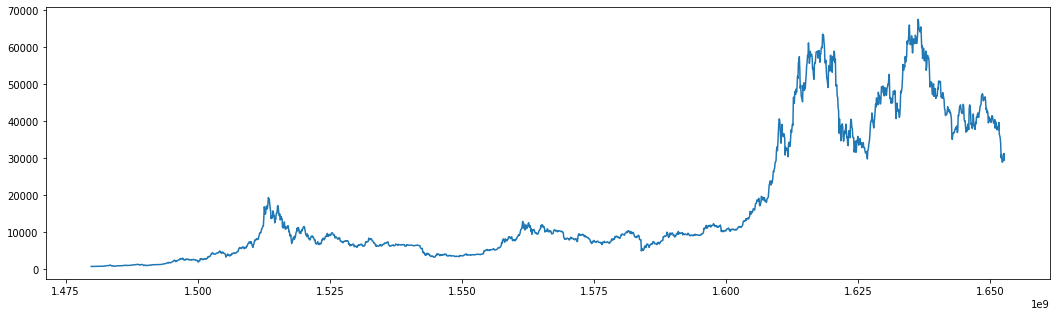

In [2]:
# get request data
# response = requests.get('https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=2000')
# print(json.loads(response.content)['Data']['Data'][-2:])
# df = pd.DataFrame(json.loads(response.content)['Data']['Data'])
with open('../../__data/crypto/btc.daily.2000','rb') as f:
    df = pickle.load(f)

df = df.set_index('time')
df = df[['high', 'low', 'open', 'volumefrom', 'volumeto', 'close']]

fig, ax = plt.subplots(1, figsize=(18, 5))
ax.plot(df['close'], label='data')

df.tail(2)

In [20]:
len_ = 90
def train_test_split(df):
    split_row = len(df) - int(0.1 * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

def extract_windows_data(df):
    window_data = []
    for idx in range(len(df) - len_):
        tmp = df[idx: (idx + len_)].copy()
        window_data.append(tmp.values)
    return np.array(window_data)

def prepare_data(df):
    train_data, test_data = train_test_split(df)
    X_train = extract_windows_data(train_data)
    X_test = extract_windows_data(test_data)
    y_train = train_data['close'][len_:].values
    y_test = test_data['close'][len_:].values
    
#     y_train = train_data['close'][:-10].values
#     y_test = test_data['close'][:-10].values
    return train_data, test_data, X_train, X_test, y_train, y_test

df2 = df.iloc[1:].reset_index(drop=True) / df.iloc[:-1].reset_index(drop=True) 
train, test, X_train, X_test, y_train, y_test = prepare_data(df2)

y_train[y_train > 1] = 1
y_train[y_train < 1] = 0
y_test[y_test > 1] = 1
y_test[y_test < 1] = 0


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train[:2])
df2.head(2)

(1710, 90, 6)
(1710,)
(110, 90, 6)
(110,)
[1. 1.]


,high,low,open,volumefrom,volumeto,close
0,0.991091,0.992958,0.988964,0.983366,0.974293,0.992227
1,0.995982,1.003828,0.992227,0.774633,0.773634,1.006909


In [21]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(units=64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 90, 256)           269312    
                                                                 
 dropout_9 (Dropout)         (None, 90, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 activation_6 (Activation)   (None, 64)                0         
                                                                 
 dropout_11 (Dropout)        (None, 64)               

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.load_weights('../../__data/crypto/CryptoCurrency V2 (class).h5')

In [23]:
history = model.fit(X_train, y_train, epochs=500, batch_size=2048, shuffle=True, validation_data=(X_test,y_test), verbose=1)

Epoch 1/500
1/1 [==============================] - 7s 7s/step - loss: 0.6937 - accuracy: 0.5357 - val_loss: 0.6933 - val_accuracy: 0.5091
Epoch 2/500
1/1 [==============================] - 2s 2s/step - loss: 0.6928 - accuracy: 0.5357 - val_loss: 0.6962 - val_accuracy: 0.5091
Epoch 3/500
1/1 [==============================] - 2s 2s/step - loss: 0.6918 - accuracy: 0.5257 - val_loss: 0.6964 - val_accuracy: 0.5091
Epoch 4/500
1/1 [==============================] - 2s 2s/step - loss: 0.6932 - accuracy: 0.5257 - val_loss: 0.6936 - val_accuracy: 0.5091
Epoch 5/500
1/1 [==============================] - 3s 3s/step - loss: 0.6957 - accuracy: 0.5140 - val_loss: 0.6932 - val_accuracy: 0.5091
Epoch 6/500
1/1 [==============================] - 3s 3s/step - loss: 0.6917 - accuracy: 0.5216 - val_loss: 0.6937 - val_accuracy: 0.5091
Epoch 7/500
1/1 [==============================] - 2s 2s/step - loss: 0.6931 - accuracy: 0.5351 - val_loss: 0.6953 - val_accuracy: 0.5091
Epoch 8/500
1/1 [=================

1/1 [==============================] - 2s 2s/step - loss: 0.6908 - accuracy: 0.5468 - val_loss: 0.6949 - val_accuracy: 0.5091
Epoch 61/500
1/1 [==============================] - 2s 2s/step - loss: 0.6904 - accuracy: 0.5456 - val_loss: 0.6948 - val_accuracy: 0.5091
Epoch 62/500
1/1 [==============================] - 2s 2s/step - loss: 0.6903 - accuracy: 0.5439 - val_loss: 0.6945 - val_accuracy: 0.5091
Epoch 63/500
1/1 [==============================] - 2s 2s/step - loss: 0.6892 - accuracy: 0.5450 - val_loss: 0.6942 - val_accuracy: 0.5091
Epoch 64/500
1/1 [==============================] - 2s 2s/step - loss: 0.6908 - accuracy: 0.5433 - val_loss: 0.6940 - val_accuracy: 0.5091
Epoch 65/500
1/1 [==============================] - 2s 2s/step - loss: 0.6899 - accuracy: 0.5427 - val_loss: 0.6940 - val_accuracy: 0.5091
Epoch 66/500
1/1 [==============================] - 2s 2s/step - loss: 0.6908 - accuracy: 0.5439 - val_loss: 0.6940 - val_accuracy: 0.5091
Epoch 67/500
1/1 [======================

KeyboardInterrupt: 

In [ ]:
model.save('../../__data/crypto/CryptoCurrency V2 (class)(len90).h5')

In [38]:
preds = model.predict(X_test).squeeze()
preds[preds > 0.5] = 1
preds[preds <= 0.5] = 0
print(preds[-10:])
print(y_test[-10:])
accuracy_score(y_test, preds)

[1. 1. 1. 0. 1. 1. 1. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 1. 1. 1. 0.]


0.4263157894736842

In [32]:
print(y_test[-10:])

[0. 0. 0. 1. 0. 0. 1. 1. 1. 0.]


In [33]:
df['close'][-10:]


time
1651881600    35469.21
1651968000    34033.77
1652054400    30076.90
1652140800    31013.12
1652227200    29017.21
1652313600    28915.72
1652400000    29244.83
1652486400    30050.31
1652572800    31296.11
1652659200    29476.24
Name: close, dtype: float64

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:left"><strong>Regression</strong><br>MohammadReza <strong>Khajedaloi</strong><br><br>
</div>
<div style="direction:rtl;text-align:right">
<a href="http://mohammadkh.ir/">WebSite</a> - <a href="https://github.com/khajedaloi/">GitHub</a> - <a href="https://www.linkedin.com/in/mohammad-kh/">Linkedin</a>
</div>
</div>